In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
zero_dict = {2:0, 
            7: np.nan,
            9: np.nan}
df['ADDEPEV2'] = df['ADDEPEV2'].replace(zero_dict)


In [5]:
df['ADDEPEV2'].shape

(34545,)

In [6]:
#df['ADDEPEV2'].dropna(inplace=True)

In [7]:
#df['ADDEPEV2'].shape

In [8]:
df['ADDEPEV2'].value_counts()

0.0    28464
1.0     5905
Name: ADDEPEV2, dtype: int64

In [9]:
df['ADDEPEV2'].describe()

count    34369.000000
mean         0.171812
std          0.377222
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ADDEPEV2, dtype: float64

In [10]:
df.groupby('_STATE')['ADDEPEV2'].describe()

,count,mean,std,min,25%,50%,75%,max
_STATE,,,,,,,,
9.0,10524.0,0.181300,0.385285,0.0,0.0,0.0,0.0,1.0
34.0,11645.0,0.163590,0.369919,0.0,0.0,0.0,0.0,1.0
36.0,12200.0,0.171475,0.376939,0.0,0.0,0.0,0.0,1.0


In [11]:
df.groupby('_STATE')['ADDEPEV2'].value_counts(normalize= True)

_STATE  ADDEPEV2
9.0     0.0         0.818700
        1.0         0.181300
34.0    0.0         0.836410
        1.0         0.163590
36.0    0.0         0.828525
        1.0         0.171475
Name: ADDEPEV2, dtype: float64

In [13]:
df['SEX'] = df['SEX'].replace(to_replace = 9,  value = None)

In [31]:
df.groupby('SEX')['ADDEPEV2'].value_counts(normalize=True)

SEX  ADDEPEV2
1.0  0.0         0.864363
     1.0         0.135637
2.0  0.0         0.799917
     1.0         0.200083
Name: ADDEPEV2, dtype: float64

In [15]:
df['ADDEPEV2'].describe()

count    34369.000000
mean         0.171812
std          0.377222
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ADDEPEV2, dtype: float64

In [24]:
gt=df['ADDEPEV2'].mean()+(1.96*(math.sqrt((df['ADDEPEV2'].mean()*(1-df['ADDEPEV2'].mean()))/df['ADDEPEV2'].count())))

In [23]:
ls=df['ADDEPEV2'].mean()-(1.96*(math.sqrt((df['ADDEPEV2'].mean()*(1-df['ADDEPEV2'].mean()))/df['ADDEPEV2'].count())))

In [28]:
CID = (round(ls,4), round(gt,4))

In [29]:
CID

(0.1678, 0.1758)

In [ ]:
#H0: DepM = DepW
#H1: DepM != DepW

In [32]:
(.2001-.1356)/.0041

15.73170731707317

In [35]:
p=1-.9999
p<0.05 #reject null

True

In [ ]:
#ChiSquare


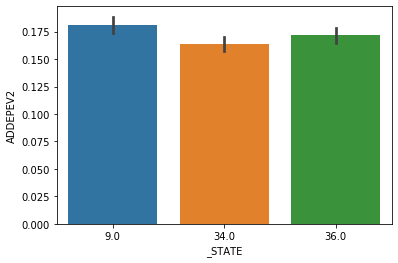

In [91]:
sns.barplot(x = '_STATE', y='ADDEPEV2', data = df)

In [61]:
df['ADDEPEV2'].mean()

0.17181180715179376

In [79]:
df.groupby('_STATE')['ADDEPEV2'].value_counts()

_STATE  ADDEPEV2
9.0     0.0          8616
        1.0          1908
34.0    0.0          9740
        1.0          1905
36.0    0.0         10108
        1.0          2092
Name: ADDEPEV2, dtype: int64

In [90]:
df.groupby('_STATE')['ADDEPEV2'].value_counts(normalize=True)

_STATE  ADDEPEV2
9.0     0.0         0.818700
        1.0         0.181300
34.0    0.0         0.836410
        1.0         0.163590
36.0    0.0         0.828525
        1.0         0.171475
Name: ADDEPEV2, dtype: float64

In [48]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [85]:
table = [	[8616, 9740, 10108],
			[1908,  1905,  2092]]
print(table)

[[8616, 9740, 10108], [1908, 1905, 2092]]


In [86]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=2
[[ 8715.85254153  9644.25150572 10103.89595275]
 [ 1808.14745847  2000.74849428  2096.10404725]]


In [87]:
prob = 0.95
critical = chi2.ppf(prob, dof)

In [88]:
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=5.991, stat=12.201
Dependent (reject H0)


In [89]:
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.002
Dependent (reject H0)


In [17]:
for x in df['WEIGHT2']:
    if x > 9000:
        df['WEIGHT2'] = df['WEIGHT2'].replace(to_replace = x, value = (x-9000) * 2.2)

In [18]:
changes = { 7777: np.nan,
            2197.8: np.nan,
            9999: np.nan}
df['WEIGHT2'] = df['WEIGHT2'].replace(changes)


In [19]:
df['WEIGHT2'].unique()

array([160. , 205. ,   nan, 165. , 164. , 103. , 125. , 230. , 130. ,
       150. , 200. , 133. , 148. , 114. , 190. , 120. , 189. , 180. ,
       140. , 131. , 135. , 155. , 156. , 137. , 166. , 175. , 128. ,
       145. , 105. , 215. , 142. , 240. , 127. , 220. , 187. , 184. ,
       221. , 147. , 197. , 159. , 174. , 195. , 157. , 163. , 141. ,
       153. , 181. , 139. , 138. , 116. , 126. , 188. , 170. , 225. ,
       143. , 110. , 172. , 124. , 176. , 198. , 210. , 275. , 207. ,
       194. , 196. , 260. , 100. , 118. , 211. , 209. , 151.8, 158. ,
       149. , 185. , 173. , 250. , 152. , 300. , 182. ,  80. , 104. ,
       199. , 280. , 270. , 191. , 178. , 117. , 265. , 179. , 129. ,
       168. , 134. , 161. , 315. , 242. , 102. , 115. , 112. , 201. ,
       192. , 132. , 123. , 136. , 108. , 258. , 106. , 255. , 235. ,
       171. , 212. , 325. , 252. , 330. , 204. , 113. , 186. , 333. ,
       245. ,  90. , 111. , 274. , 151. , 340. , 162. ,  97. , 239. ,
       285. , 290. ,